In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.DataFrame({
    'x': [12,20,28,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,63,70,66,63,58,23,14,8,19,7,24]
})

In [20]:
np.random.seed(200)
k =3
centroids = {
    i+1: [np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

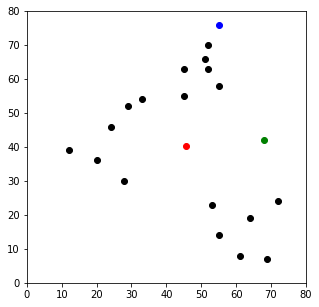

In [29]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap = {1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

    x   y  distance_from_1  closet color
0  12  39      2064.697531       1     r
1  20  36      2059.697531       1     r
2  28  30      2057.697531       1     r
3  29  52      2034.697531       1     r
4  33  54      2028.697531       1     r


D:\Software\Installed Software\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.
D:\Software\Installed Software\Anaconda\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


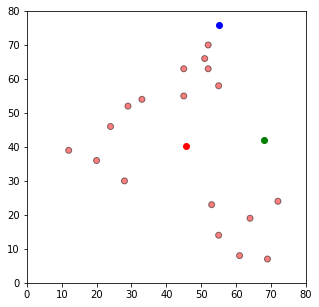

In [30]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] -centroids[i][0]**2
                +df['y']-centroids[i][1])**2
            )
        )
        centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
        df['closet'] = df.loc[:,centroids_distance_cols].idxmin(axis=1)
        df['closet'] = df['closet'].map(lambda x: int(x.lstrip('distance_from_')))
        df['color'] = df['closet'].map(lambda x: colmap[x])
        return df
    
df = assignment(df,centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

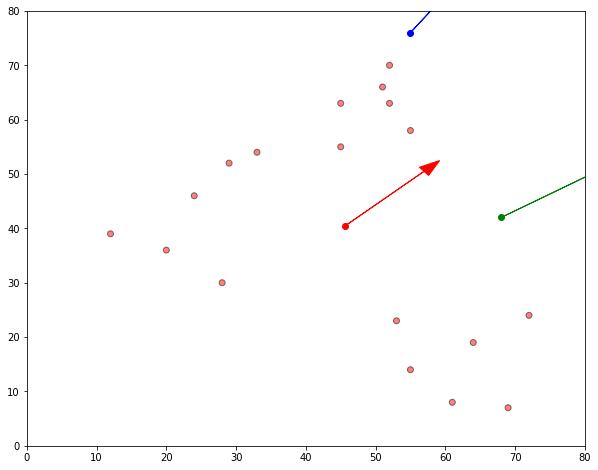

In [34]:
import copy 
old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closet'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closet'] == i]['y'])
        return k
    
centroids = update(centroids)

fig = plt.figure(figsize=(10,8))
ax = plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0] * 0.75)
    dy = (centroids[i][1] - old_centroids[i][1] * 0.75)
    ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=3,fc=colmap[i],ec=colmap[i])
plt.show()
    

D:\Software\Installed Software\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.
D:\Software\Installed Software\Anaconda\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


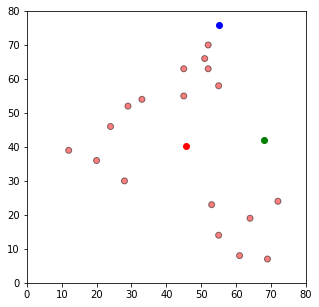

In [36]:
while True:
    closest_centroids = df['closet'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if closest_centroids.equals(df['closet']):
        break
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()
    
    

In [41]:
df = pd.DataFrame({
    'x': [12,20,28,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,63,70,66,63,58,23,14,8,19,7,24]
})

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

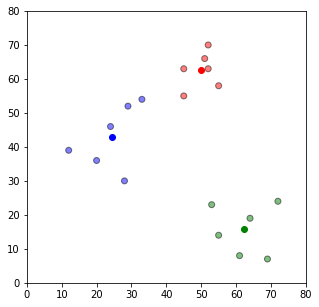

In [50]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1],labels)
colors1 = list(colors)
plt.scatter(df['x'],df['y'],color = colors1,alpha=0.5,edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()